Students Performance in Exams - Multiple Component Analysis and Logistic Regression 

Context:
Marks secured by the students
Content:
This data set consists of the marks secured by the students in various subjects.
Acknowledgements:http://roycekimmons.com/tools/generated_data/exams

Inspiration:
To understand the influence of the parents background, test preparation etc on students performance.

Example Research questions:
How effective is the test preparation course?
Which major factors contribute to test outcomes?
What would be the best way to improve student scores on each test?
What patterns and interactions in the data can you find? Let me know in the comments section below

Part one: Exploratory Analysis

Part 0 - Data Importation

In [2]:
# Importation Data

# Load the Pandas libraries with alias 'pd' 
import pandas as pd

# Read data from file 'filename.csv' 
df = pd.read_csv("C:\\Users\\William\\Documents\\Data Science - ML\\Projects ML\\Project Kaggle - Students Performance in Exams\\StudentsPerformance.csv") 

#Preview the first 5 lines of the loaded data.
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group D,high school,free/reduced,completed,64,64,67
1,male,group C,master's degree,free/reduced,completed,46,42,46
2,female,group B,some college,free/reduced,completed,65,75,70
3,male,group B,some college,free/reduced,completed,59,65,66
4,female,group A,associate's degree,standard,completed,55,65,62


In [3]:
#Preview the 5 last lines of the loaded data.
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group D,bachelor's degree,standard,none,89,100,100
996,female,group C,associate's degree,standard,none,91,95,94
997,male,group D,some high school,standard,none,81,78,78
998,female,group C,some high school,standard,none,74,75,82
999,female,group D,some college,free/reduced,none,77,86,86


Part I - Descriptive Analysis

a - Variables Pre-treatment

In [4]:
# General informations on the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Check how many line are null
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values here.

In [6]:
# List of the column header
df.columns.values

array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'], dtype=object)

In [7]:
# Check the type of each: they are not list
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [8]:
# To get the index and columns as lists, we can use the tolist() method.
df.columns.tolist()
df.index.tolist()

print (type(df.columns.tolist()))
print (type(df.index.tolist()))

<class 'list'>
<class 'list'>


In [9]:
# Print the dimension of the dataframe
print ('data dimension:', df.shape)

data dimension: (1000, 8)


Matrix of 1000 lines for 8 columns

In order to do our study, we need to set a minimum score for passing the exam.
We set it as the average of the three marks, to be at least more than 70.

In [10]:
# Creation of a variable, "avg_score", the average of the 3 marks
df['avg_score'] = round(df[['math score','reading score','writing score']].sum(axis=1)/3,1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,male,group D,high school,free/reduced,completed,64,64,67,65.0
1,male,group C,master's degree,free/reduced,completed,46,42,46,44.7
2,female,group B,some college,free/reduced,completed,65,75,70,70.0
3,male,group B,some college,free/reduced,completed,59,65,66,63.3
4,female,group A,associate's degree,standard,completed,55,65,62,60.7


In [11]:
# Creation of a binary variable "result": 1 if failed 0 if succeed.
# We set the cut-off at a score above or equal 70 ad we do a function for that.

def test(data):
    if data['avg_score'] >= 70:
        return 1
    else:
        return 0

df['result'] = df.apply(test, axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,result
0,male,group D,high school,free/reduced,completed,64,64,67,65.0,0
1,male,group C,master's degree,free/reduced,completed,46,42,46,44.7,0
2,female,group B,some college,free/reduced,completed,65,75,70,70.0,1
3,male,group B,some college,free/reduced,completed,59,65,66,63.3,0
4,female,group A,associate's degree,standard,completed,55,65,62,60.7,0


Before starting, let's have a look at the balance of the sample regardingthe two outcome.

In [13]:
# Some stats purely descriptive

count_failed = len(df[df['result']==0])
count_passed = len(df[df['result']==1])

pct_of_passed = count_passed/(count_failed+count_passed)
print("Percentage of passed is", pct_of_passed*100)

pct_of_failed = count_failed/(count_failed+count_passed)
print("Percentage of failed is", pct_of_failed*100)

Percentage of passed is 45.9
Percentage of failed is 54.1


The two classes are well balanced. We won't need to do any treatment to correct imbalances.

1 - Univariate exploration

a - Quantitative variables

In [14]:
# quick view on the numerical data
df.describe()

,math score,reading score,writing score,avg_score,result
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.769800,0.459000
std,15.16308,14.600192,15.195657,14.257197,0.498566
min,0.00000,17.000000,10.000000,9.000000,0.000000
25%,57.00000,59.000000,57.750000,58.300000,0.000000
50%,66.00000,70.000000,69.000000,68.300000,0.000000
75%,77.00000,79.000000,79.000000,77.700000,1.000000
max,100.00000,100.000000,100.000000,100.000000,1.000000


C:\Users\William\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


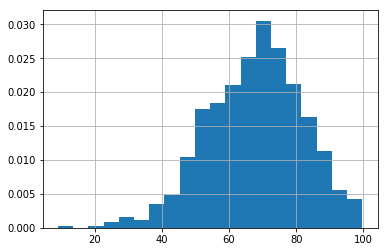

In [18]:
# Histogramm for continuous variables

import matplotlib.pyplot as plt

# Average score
df[df.avg_score.abs() < 100]["avg_score"].hist(normed=True,bins=20)
plt.show()

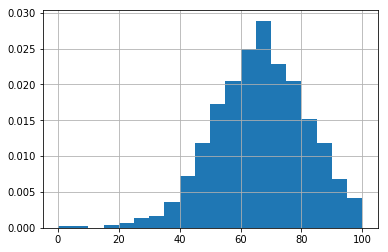

In [19]:
# Maths score
df[df.avg_score.abs() < 100]["math score"].hist(normed=True,bins=20)
plt.show()

The shape of the average describe a Gaussian centered on its mean which is expected for continuous variables.

In [16]:
# Table of correlation between variable
df.corr()

,math score,reading score,writing score,avg_score,result
math score,1.000000,0.817580,0.802642,0.918730,0.723382
reading score,0.817580,1.000000,0.954598,0.970328,0.776338
writing score,0.802642,0.954598,1.000000,0.965680,0.764121
avg_score,0.918730,0.970328,0.965680,1.000000,0.792865
result,0.723382,0.776338,0.764121,0.792865,1.000000


We observe that reading and writing are particularly correlated.

b - Categorical variables

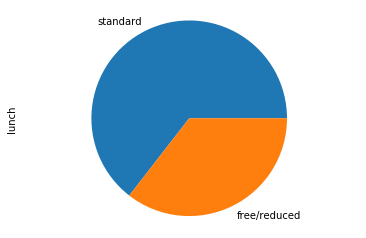

In [20]:
# Pie charts

# Lunch
df["lunch"].value_counts(normalize=True).plot(kind='pie')

plt.axis('equal') 
plt.show() 

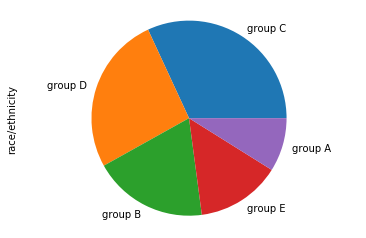

In [21]:
# Race and ethnicity
df["race/ethnicity"].value_counts(normalize=True).plot(kind='pie')

plt.axis('equal') 
plt.show() 

Let's cross the variables together.

2 - Bivariate Analysis

a - Between two quantitative variables

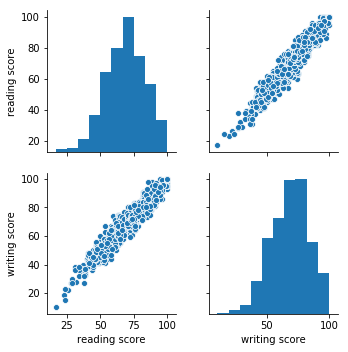

In [22]:
# Pair plot drawing
import seaborn as sns

sns.pairplot(df[['reading score', 'writing score']])

The graphs confirm the high correlation between reading and writing scores.

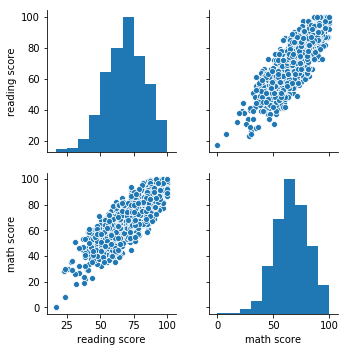

In [23]:
# Pair plot drawing
sns.pairplot(df[[ 'reading score', 'math score']])

Less corelation with math.

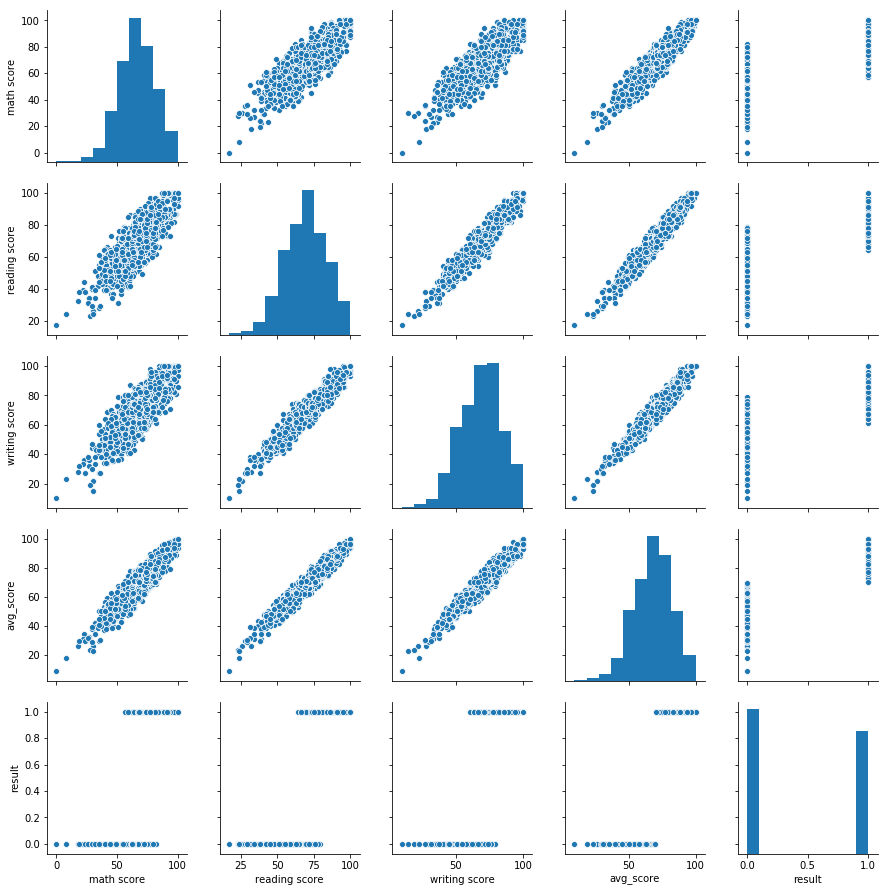

In [25]:
# Overall view of the correlation betwenn the quantitative variables
sns.pairplot(df)

b - Between qualitative and quantitative

Study of the relation between the categorical variables and the average score.

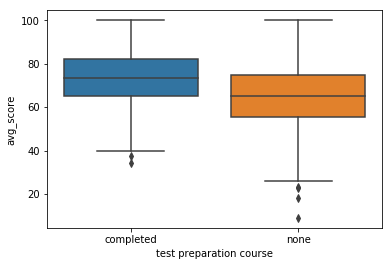

In [26]:
# Simple box plot

import seaborn as sns

sns.boxplot(x="test preparation course", y="avg_score", data=df)

Completing the course seems to be beneficial for students who have a better average. Let's add other variables:

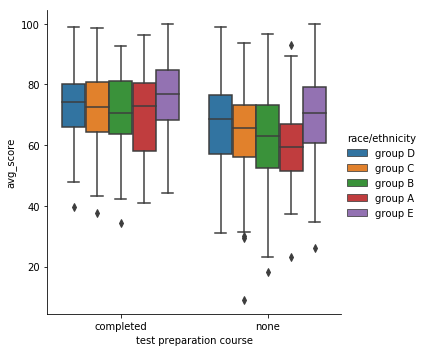

In [28]:
# Other box-plot

sns.catplot(x="test preparation course", y="avg_score", hue="race/ethnicity", kind="box", data=df);

In [ ]:
Group E has better average than the other group.

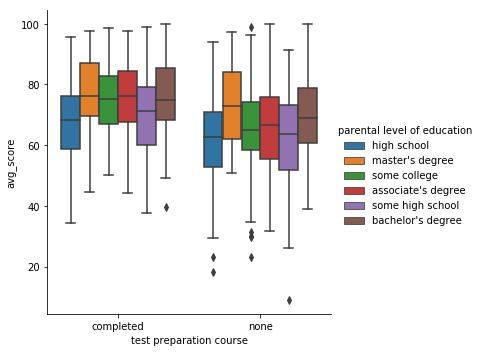

In [27]:
sns.catplot(x="test preparation course", y="avg_score", hue="parental level of education", kind="box", data=df);

We observe that students with parents having an highr education degree are performing better.

In [12]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


Simple charts for recap:

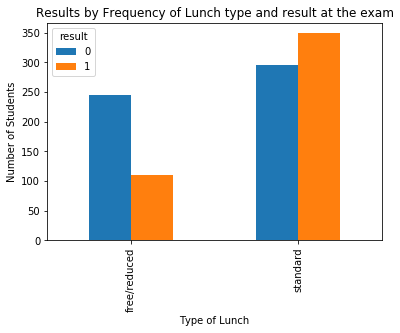

In [35]:
# Simple chart

pd.crosstab(df.lunch,df.result).plot(kind='bar')
plt.title('Results by Frequency of Lunch type and result at the exam')
plt.xlabel('Type of Lunch')
plt.ylabel('Number of Students')
plt.savefig('Number of Students')

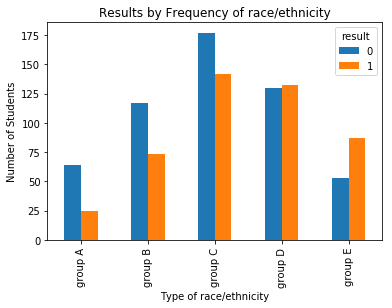

In [34]:
pd.crosstab(df["race/ethnicity"],df.result).plot(kind='bar')
plt.title('Results by Frequency of race/ethnicity')
plt.xlabel('Type of race/ethnicity')
plt.ylabel('Number of Students')
plt.savefig('Number of Students')

Pivot table session

In [36]:
# Some pivot table, to have a quick idea of the picture
table=df.pivot_table('avg_score',index='race/ethnicity',columns='result',aggfunc='mean')
table

result,0,1
race/ethnicity,,
group A,55.879688,81.188000
group B,56.379487,80.039726
group C,57.441808,79.207746
group D,58.559231,79.638636
group E,58.126415,81.656322


In [37]:
table=df.pivot_table('avg_score',index='parental level of education',columns='result',aggfunc='mean')
table

result,0,1
parental level of education,,
associate's degree,58.460714,80.877273
bachelor's degree,59.682692,81.572727
high school,56.088550,77.229231
master's degree,59.517391,82.591667
some college,58.075424,79.834259
some high school,55.360000,78.931081


In [38]:
#Other tables by linch type and race group

grouped_data = df.groupby(['lunch', 'race/ethnicity'])
grouped_data['avg_score'].describe()

count       mean        std   min     25%   50%  \
lunch        race/ethnicity                                                    
free/reduced group A          36.0  57.647222  13.730456  23.3  48.975  56.0   
             group B          69.0  60.973913  15.937909  18.3  52.300  62.0   
             group C         114.0  60.413158  13.187152   9.0  53.400  61.2   
             group D          95.0  64.669474  13.752679  31.0  54.500  65.0   
             group E          41.0  67.492683  15.616280  34.7  55.700  70.0   
standard     group A          53.0  66.616981  13.901158  39.3  56.000  65.0   
             group B         121.0  68.033884  13.405270  29.7  59.300  67.7   
             group C         205.0  70.866341  12.820319  29.3  61.700  71.3   
             group D         167.0  71.744910  12.275707  38.7  64.700  72.7   
             group E          99.0  74.925253  13.604271  26.0  67.350  75.3   

                               75%    max  
lunch        race/ethnicity                
free/reduced group A         67.25   83.3  
             group B         73.30   89.3  
             group C         69.60   89.3  
             group D         74.65   97.7  
             group E         78.30   97.7  
standard     group A         74.70   96.3  
             group B         78.70   96.7  
             group C         79.00   98.7  
             group D         79.70   99.0  
             group E         85.00  100.0